# SISTEMAS IDEALES<a class="tocSkip">
## SISTEMAS Y SEÑALES <a class="tocSkip">
### Ingenieria de Telecomunicaciones <a class="tocSkip">
### Universidad Pontificia Bolivariana <a class="tocSkip">   
### Por: Jose R. Zapata - [https://joserzapata.github.io/](https://joserzapata.github.io/) <a class="tocSkip">
**joser.zapata@upb.edu.co**

# Sistemas ideales

Los sistemas idealizados son sistemas con propiedades idealizadas que típicamente hacen que su implementación práctica sea inviable. Desempeñan un papel importante en varios campos del procesamiento de señales, ya que permiten una formulación conveniente de los principales conceptos y principios. A continuación, se presenta el paso bajo ideal como prototipo para un sistema selectivo de frecuencia idealizado. Se pueden deducir otros sistemas selectivos de frecuencia directamente de este prototipo.

# Pasa bajo ideal

La función de transferencia $ H (j\omega) $ de un valor real [ideal low-pass](https://en.wikipedia.org/wiki/Sinc_filter) dice

\begin{equation}
H(j \omega) = \text{rect} \left( \frac{\omega}{2 \omega_\text{c}} \right)
\end{equation}

donde $ \omega_\text{c}> 0 $ denota su frecuencia de corte. El pasa bajo ideal elimina todos los componentes de frecuencia por encima de la frecuencia de corte $ \omega_ \text {c} $, sin afectar las frecuencias más bajas. La respuesta al impulso $h(t) = \mathcal{F}^{-1} \{ H(j \omega) \}$ se calcula aplicando el [duality principle](../fourier_transform/properties.ipynb#Duality) a la [Fourier transform of the rectangular signal](../fourier_transform/definition.ipynb#Transformation-of-the-Rectangular-Signal)

\begin{equation}
h(t) = \frac{\omega_\text{c}}{\pi} \cdot \text{sinc} ( \omega_\text{c} t )
\end{equation}


Dado que la respuesta al impulso es una señal acausal, el pasa bajo ideal es un [acausal system](causality_stability.ipynb#Condition-for-the-Impulse-Response). 
Además, la función sinc no es absolutamente integrable. Por lo tanto, el pasa bajo ideal no es un [stable system](causality_stability.ipynb#Condition-for-the-Impulse-Response) 
en el sentido del criterio de entrada limitada de salida limitada (BIBO). En conclusión, el pasa bajo ideal no es realizable. Solo se puede aproximar en sistemas prácticos. Sin embargo, juega un papel importante en la teoría del muestreo y la interpolación.

## Pasa bajos realizable

Se han desarrollado varias técnicas para aproximar el pasa bajo ideal mediante un sistema realizable. Uno es el *windowed sinc filter*. Para hacer que el filtro de paso bajo ideal sea causal y estable, su respuesta de impulso se abre a un $ T $ de longitud finita seguido de un cambio temporal de $ \ frac {T} {2} $. Usando la [rectanglar signal](../continuous_signals/standard_signals.ipynb#Rectangular-Signal) para truncar la respuesta al impulso, la respuesta al impulso del pasa bajo realizable se da como

\begin{equation}
h(t) = \frac{\omega_\text{c}}{\pi} \cdot \text{sinc} \left( \omega_\text{c} \left(t - \frac{T}{2} \right) \right) \cdot \text{rect}\left( \frac{1}{T} \left( t - \frac{T}{2} \right) \right)
\end{equation}


La transformación de Fourier produce su función de transferencia

\begin{equation}
H(j \omega) = \frac{1}{2 \pi} e^{-j \omega \frac{T}{2}} \cdot \text{rect}\left( \frac{\omega}{2 \omega_c} \right) * T \cdot \text{sinc} \left( \frac{T}{2} \omega \right)
\end{equation}


La respuesta al impulso se traza para $ w_ \text {c} = 10 $ y $ T = 5 $

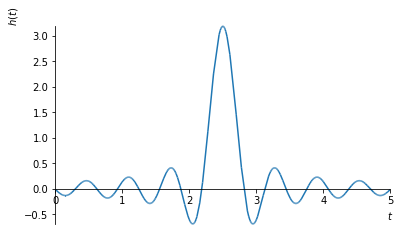

In [1]:
import sympy as sym
%matplotlib inline
sym.init_printing()

t, w = sym.symbols('t omega', real=True)
wc = 10
T = 5

h = wc/sym.pi * sym.sinc(wc*(t-T/2))
sym.plot(h, (t, 0, T), xlabel='$t$', ylabel='$h(t)$');

La función de transferencia $ H (j \omega) $ del pasA bajo realizable se proporciona anteriormente en términos de una integral de convolución sobre la señal rectangular y sinc. Aplicando la definición de la convolución y explotando las propiedades de los rendimientos de señal rectangular

\begin{equation}
H(j \omega) = \frac{T}{2 \pi} e^{-j \omega \frac{T}{2}} \int_{-\omega_\text{c}}^{\omega_\text{c}} \text{sinc} \left( \frac{T}{2} (\nu - \omega) \right) d \nu
\end{equation}

No se conoce una solución cerrada de esta integral. Para obtener información sobre las propiedades del pasA bajo realizable, la función de transferencia se aproxima mediante la integración numérica pOR frecuencias angulares igualmente espaciadas $ \omega $. Solo se evalúan las frecuencias angulares positivas para reducir la complejidad computacional. Tenga en cuenta que se aplican las relaciones de simetría de un sistema de valores reales

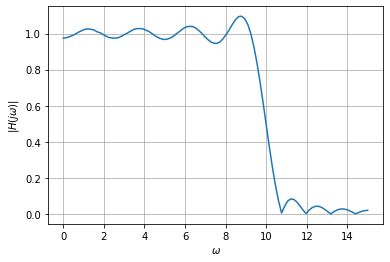

In [2]:
from numpy import linspace, array
import matplotlib.pyplot as plt

nu = sym.symbols('nu', real=True)
w = linspace(0, 1.5*wc, 100)

H = [(T/(2*sym.pi)).evalf(2) * sym.exp(-sym.I*wi*T/2).evalf(2) *
     sym.Integral(sym.sinc(T/2*(nu-wi)), (nu, -wc, wc)).evalf(2) for wi in w]

plt.plot(w, abs(array(H)))
plt.xlabel('$\omega$')
plt.ylabel('$|H(j \omega)|$')
plt.grid();


**Ejercicio**

* Discuta las propiedades de la respuesta de magnitud $ | H (j \omega) | $ del pasa bajo realizable en dependencia de su longitud $ T $.

# Pasa Bandas Ideal

La función de transferencia $ H (j \omega) $ de una pasa banda ideal con valor real es:

\begin{equation}
H(j \omega) = 
\begin{cases}
1 & \text{for }  \omega_\text{c} - \frac{\Delta \omega}{2} < |\omega| < \omega_\text{c} + \frac{\Delta \omega}{2} \\
0 & \text{otherwise}
\end{cases}
\end{equation}

El pasa banda ideal no afecta los componentes de frecuencia de una señal alrededor de una frecuencia central dada $ \omega_ \text {c} $ donde el ancho total de esta banda de transición es $ \Delta \omega $. Los componentes fuera de la banda de transición se eliminan. La función de transferencia puede reescribirse como

\begin{equation}
H(j \omega) =
\text{rect} \left( \frac{\omega - \omega_\text{c}}{\Delta \omega} \right) + \text{rect} \left( \frac{\omega + \omega_\text{c}}{\Delta \omega} \right)
= \text{rect} \left( \frac{\omega}{\Delta \omega} \right) * \left( \delta(\omega - \omega_\text{c}) + \delta(\omega + \omega_\text{c}) \right)
\end{equation}


Su respuesta al impulso se calcula mediante la transformación inversa de Fourier.

\begin{equation}
h(t) = \pi \Delta \omega \cdot \text{sinc} ( \frac{\Delta \omega}{2} t ) \cdot \cos(\omega_\text{c} t)
\end{equation}

El pasa banda ideal se puede interpretar como un filtro de pasa bajo modulado. Debido a su relación directa con el pasa bajo ideal, no es causal ni estable. El pasa banda ideal solo se puede aproximar en realizaciones prácticas. Tiene un papel importante en los fundamentos teóricos de las comunicaciones inalámbricas.


**Ejemplo**

Por ejemplo, se traza la respuesta de impulso del pasa banda ideal para $ \omega_ \text {c} = 10 $ y $ \Delta \omega = 2 $

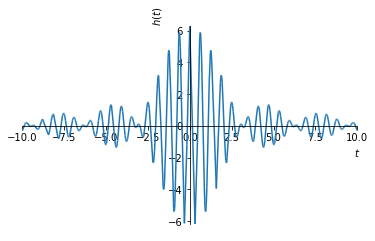

In [3]:
wc = 10
dw = 2

h = sym.pi*dw * sym.sinc(dw/2*t) * sym.cos(wc*t)
sym.plot(h, (t, -10, 10), xlabel='$t$', ylabel='$h(t)$');

**Ejercicio**

* De la misma manera que para el pasa bajo, deriva la respuesta al impulso y la función de transferencia de un pasa banda realizable.

# Pasa alto ideal


La función de transferencia $ H (j \omega) $ de un paso alto ideal con valor real dice: 

\begin{equation}
H(j \omega) = 1 - \text{rect} \left( \frac{\omega}{2 \omega_\text{c}} \right)
\end{equation}

donde $ \omega_ \text {c}> 0 $ denota su frecuencia de corte. El pasa alto ideal elimina todos los componentes de frecuencia por debajo de la frecuencia de corte $ \omega_ \text {c} $, sin afectar las frecuencias más altas. Su respuesta al impulso puede derivarse de manera directa de la respuesta al impulso del pasa bajo ideal

\begin{equation}
h(t) = \delta(t) - \frac{\omega_\text{c}}{\pi} \cdot \text{sinc} ( \omega_\text{c} t )
\end{equation}


Debido a su relación con el pasa bajo ideal, el pasa alto ideal no es causal ni estable. El pase alto ideal solo se puede aproximar en realizaciones prácticas.

# Rechaza Banda Ideal

La función de transferencia $ H (j \omega) $ de una parada de banda ideal con valor real se deriva de la función de transferencia del pasa banda ideal de la misma manera que el pasa alto ideal. Se lee

\begin{equation}
H(j \omega) =  1 - \text{rect} \left( \frac{\omega - \omega_\text{c}}{\Delta \omega} \right) - \text{rect} \left( \frac{\omega + \omega_\text{c}}{\Delta \omega} \right)
\end{equation}

La parada de banda ideal elimina los componentes de frecuencia de una señal alrededor de una frecuencia central dada $ \omega_ \text {c} $ donde el ancho total de esta banda de parada es $ \Delta \omega $. Los componentes fuera de la parada de banda no se ven afectados por el sistema. La respuesta al impulso de la parada de banda ideal se puede derivar de manera directa de la respuesta al impulso del pasa de banda ideal como :

\begin{equation}
h(t) = \delta(t) - \pi \Delta \omega \cdot \text{sinc} ( \frac{\Delta \omega}{2} t ) \cdot \cos(\omega_\text{c} t)
\end{equation}

Debido a su relación con el pasa banda ideal, la parada de banda ideal no es causal ni estable. La parada de banda ideal solo se puede aproximar en realizaciones prácticas. La parada de banda ideal se usa, por ejemplo, para eliminar componentes de señal no deseados. [mains hum](https://en.wikipedia.org/wiki/Mains_hum).

# REFERENCIAS

- *Lecture Notes on Signals and Systems* by Sascha Spors.